# Classic Control: Control theory problems from the classic RL literature

<br><br>

In this notebook we will present some classic environments in Reinforcement Learning research. These environments have continuous states spaces (i.e., infinite possible states) and therefore tabular methods cannot solve them. To tackle these environments (and more complex ones) we will have two tools:

- Extend the tabular methods with the techniques of discretization and tile coding
- Use function approximators (Neural Networks)



<br><br><br>
<div style="text-align:center">
    <b>This notebook belongs to the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>


<br><br>

<table>
    <tr style="background-color: transparent">
            <td>
        <a target="_parent" href="https://colab.research.google.com/github/escape-velocity-labs/evrl/blob/main/notebooks/Classic_Control_Introduction.ipynb" style="float: center">
            <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
        </a>  
    </td>
    </tr>
    <tr>
        <th style="text-align: center">Open this notebook in Google colab</th>
    </tr>
</table>

<br>

In [35]:
import gym  # Import the OpenAI Gym library, which provides access to various reinforcement learning environments
import numpy as np  # Import numpy library for numerical computations
from IPython import display  # Import display module from IPython for dynamic display in Jupyter Notebooks
from matplotlib import pyplot as plt  # Import matplotlib library for data visualization
%matplotlib inline  

In [36]:
def test_env(env: gym.Env) -> None:
    env.reset()  # Reset the environment to its initial state
    done = False  # Initialize the 'done' flag to False, indicating the episode is not yet finished
    img = plt.imshow(env.render(mode='rgb_array'))  # Capture the initial state of the environment as an image
    while not done:  # Continue the loop until the episode is finished
        _, _, done, _ = env.step(env.action_space.sample())  # Take a random action in the environment
        img.set_data(env.render(mode='rgb_array'))  # Update the image with the new state of the environment
        plt.axis('off')  # Turn off axis display in the plot
        display.display(plt.gcf())  # Display the current figure (plot) containing the environment image
        display.clear_output(wait=True)  # Clear the output display, waiting for the next frame to be displayed


## CartPole: Keep the tip of the pole straight.

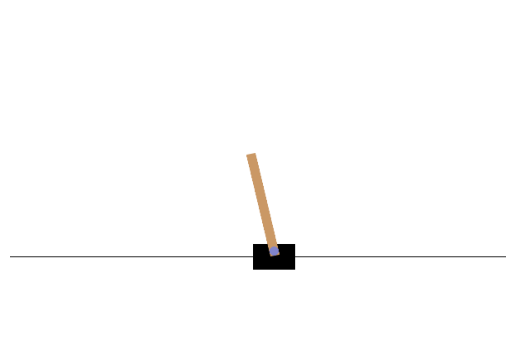

In [37]:
env = gym.make('CartPole-v1')  # Create an instance of the CartPole environment with the version 'v1'
test_env(env)  # Call the test_env function to visualize the behavior of the CartPole environment
env.close()  # Close the CartPole environment once visualization is complete


##### The state

The states of the cartpole task will be represented by a vector of four real numbers:

        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf


In [38]:
env.observation_space  # Retrieve and display the observation space of the environment


Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

##### The actions available

We can perform two actions in this environment:

        0     Push cart to the left.
        1     Push cart to the right.



In [39]:
env.action_space  # Retrieve and display the action space of the environment


Discrete(2)

## Acrobot: Swing the bar up to a certain height.

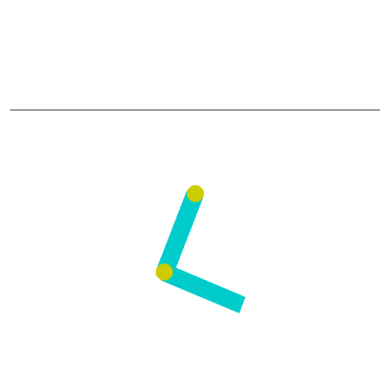

In [ ]:
env = gym.make('Acrobot-v1')  # Create an instance of the Acrobot environment with the version 'v1'
test_env(env)  # Call the test_env function to visualize the behavior of the Acrobot environment
env.close()  # Close the Acrobot environment once visualization is complete


##### The state

The states of the cartpole task will be represented by a vector of six real numbers. The first two are the cosine and sine of the first joint. The next two are the cosine and sine of the other joint. The last two are the angular velocities of each joint.
    
$\cos(\theta_1), \sin(\theta_1), \cos(\theta_2), \sin(\theta_2), \dot\theta_1, \dot\theta_2$

In [ ]:
env.observation_space # Retrieve and display the observation space of the environment

##### The actions available

We can perform two actions in this environment:

    0    Apply +1 torque on the joint between the links.
    1    Apply -1 torque on the joint between the links. 

In [ ]:
env.action_space # Retrieve and display the action space of the environment

## MountainCar: Reach the goal from the bottom of the valley.

In [ ]:
env = gym.make('MountainCar-v0')  # Create an instance of the MountainCar environment with the version 'v0'
test_env(env)  # Call the test_env function to visualize the behavior of the MountainCar environment
env.close()  # Close the MountainCar environment once visualization is complete


##### The state

The observation space consists of the car position $\in [-1.2, 0.6]$ and car velocity $\in [-0.07, 0.07]$

In [ ]:
env.observation_space # Retrieve and display the observation space of the environment

##### The actions available


The actions available three:

    0    Accelerate to the left.
    1    Don't accelerate.
    2    Accelerate to the right.

In [ ]:
env.action_space # Retrieve and display the action space of the environment

## Pendulum: swing it and keep it upright

In [ ]:
env = gym.make('Pendulum-v1')  # Create an instance of the Pendulum environment with the version 'v1'
test_env(env)  # Call the test_env function to visualize the behavior of the Pendulum environment
env.close()  # Close the Pendulum environment once visualization is complete


##### The state

The state is represented by a vector of three values representing $\cos(\theta), \sin(\theta)$ and speed ($\theta$ is the angle of the pendulum).

In [ ]:
env.observation_space # Retrieve and display the observation space of the environment

##### The actions available

The action is a real number in the interval $[-2, 2]$ that represents the torque applied on the pendulum.

In [ ]:
env.action_space # Retrieve and display the action space of the environment

## Resources

[[1] OpenAI gym: classic control environments](https://gym.openai.com/envs/#classic_control)